In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json

Configure the ERDDAP to search

In [2]:
ra = 'maracoos'

with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls[ra.lower()]

print(server)

e = ERDDAP(server=server, protocol="tabledap")

https://erddap.maracoos.org/erddap


Pull in the processed inventory

In [3]:
#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).

df = pd.read_excel('2021/data/processed/%s.xlsx' % ra.upper(), dtype=str)
df

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,Unnamed: 18
0,MARACOOS,Jug_Bay,N/A: No WMO numbers,Jug_Bay - Maryland DNR Station,Maryland Department of Natural Resources water...,38.7813,-76.7137,fixed,2003,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN
1,MARACOOS,Aquarium_West,N/A: No WMO numbers,Aquarium_West - Maryland DNR Station,Maryland Department of Natural Resources water...,39.2854,-76.6088,fixed,2016,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN
2,MARACOOS,Aquarium_East,N/A: No WMO numbers,Aquarium_East - Maryland DNR Station,Maryland Department of Natural Resources water...,39.2855,-76.608,fixed,2016,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN
3,MARACOOS,Sandy_Pt_South_Beach,N/A: No WMO numbers,Sandy_Pt_South_Beach - Maryland DNR Station,Maryland Department of Natural Resources water...,39.0075,-76.4003,fixed,2004,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN
4,MARACOOS,Otter_Point_Creek,N/A: No WMO numbers,Otter_Point_Creek - Maryland DNR Station,Maryland Department of Natural Resources water...,39.4508,-76.2746,fixed,2003,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN
5,MARACOOS,Tolchester,N/A: No WMO numbers,Tolchester - Maryland DNR Station,Maryland Department of Natural Resources water...,39.2135,-76.2462,fixed,2015,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN
6,MARACOOS,Little_Monie_Creek,N/A: No WMO numbers,Little Monie Creek - Maryland DNR Station,Maryland Department of Natural Resources water...,38.2086,-75.8046,fixed,2006,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN
7,MARACOOS,Pier_26,N/A: No WMO numbers,Pier 26 Weather/Hydro Station - HRECOS,Hudson River Environmental Conditions Observin...,40.721538,-74.0156,fixed,2016,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN
8,MARACOOS,Pier_84,N/A: No WMO numbers,Pier_84 Hydro/weather Station - HRECOS,Hudson River Environmental Conditions Observin...,40.764628,-74.003186,fixed,2012,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN
9,MARACOOS,Mowhawk R. Lock 8 weather,N/A: No WMO numbers,Port of Albany hydro/weather station - HRECOS,Hudson River Environmental Conditions Observin...,42.8302,-73.9925,fixed,2012,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN


Search the ERDDAP server for a single station of interest - more of a test

In [4]:
# df['Station ID'].loc[df['Station ID'].isna()] = df.loc[df['Station ID'].isna(),'Dataset ID']

# df['Station ID']

In [5]:
df_wf = df[df['Station ID'] == 'Jug_Bay']

# for SCCOOS need to search for 'Station Long Name' as 'Station ID' is NA for most entries
search_for = df_wf['Station ID'].to_string()

search_url = e.get_search_url(search_for=search_for, response="csv")

try:
    resp = pd.read_csv(search_url)
    print(resp['Station ID'])
except:
    pass

Rip through all the datasets in the inventory and see if they exist on the RA erddap. Process checks the following order:

1. `Station ID`, then 
2. `Station Long Name`, then
3. `WMO ID or NWS/CMAN ID`

We first check if the value is `nan`. If so, we punt as that will return all datasets from the ERDDAP service.

In [6]:
not_found = []
found = dict()

exclude = ' -gliders'

search_order = ['Station ID', 'Station Long Name', 'WMO ID or NWS/CMAN ID']

for search1 in df[search_order[0]].astype(str):
    
    if search1 == "nan":
        print("punting with station long name = nan\n")
        not_found.append(search1)
        continue
    
    try:
        print('searching \"%s\" = \"%s\"' % (search_order[0], search1))
        search_url = e.get_search_url(search_for=search1+exclude, response="csv")
        resp = pd.read_csv(search_url)
        
        print("Found \"%s\": %s" % (search1,resp['Dataset ID'].values.tolist()))
        
        found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
        
    except:
        
        print('no dataset matching \"%s\"' % search1)
        search2 = df.loc[df[search_order[0]] == search1, search_order[1]].values.tolist()[0]
        
        if search2 == "nan":
                print("punting with %s = nan\n" % search_order[1])
                not_found.append(search1)
                continue
                
        try:
            
            print('searching \"%s\" = \"%s\"' % (search_order[1], search2))
            search_url = e.get_search_url(search_for=search2+exclude, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (search2,resp['Dataset ID'].values.tolist()))
            
            found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
            
        except:

            search3 = str(df.loc[df[search_order[0]] == search1, search_order[2]].values.tolist()[0])
            
            if search3 == "nan":
                print("punting with \"%s\" = nan\n" % search_order[2])
                not_found.append(search1)
                continue
            
            try:
                print('searching \"%s\" = \"%s\"' % (search_order[2], search3))
                search_url = e.get_search_url(search_for=search3+exclude, response="csv")
                resp = pd.read_csv(search_url)
                print("Found \"%s\": %s" % (search3,resp['Dataset ID'].values.tolist()))
                
                found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
                
            except:
                print("Couldn't find:", [search1, search2, search3])
                not_found.append(search1)
        
    print("\n")

searching "Station ID" = "Jug_Bay"
Found "Jug_Bay": ['mddnr_Jug_Bay']


searching "Station ID" = "Aquarium_West"
Found "Aquarium_West": ['mddnr_Aquarium_West']


searching "Station ID" = "Aquarium_East"
Found "Aquarium_East": ['mddnr_Aquarium_East_-_Bottom', 'mddnr_Aquarium_East_-_Surface']


searching "Station ID" = "Sandy_Pt_South_Beach"
no dataset matching "Sandy_Pt_South_Beach"
searching "Station Long Name" = "Sandy_Pt_South_Beach - Maryland DNR Station"
searching "WMO ID or NWS/CMAN ID" = "N/A: No WMO numbers"
Couldn't find: ['Sandy_Pt_South_Beach', 'Sandy_Pt_South_Beach - Maryland DNR Station', 'N/A: No WMO numbers']


searching "Station ID" = "Otter_Point_Creek"
Found "Otter_Point_Creek": ['mddnr_Otter_Point_Creek']


searching "Station ID" = "Tolchester"
Found "Tolchester": ['mddnr_Tolchester', 'mddnr_Dares_Beach', 'mddnr_Gooses_-_Bottom', 'mddnr_Iron_Pot_Landing', 'mddnr_Riverside', 'mddnr_Camp_Tockwogh', 'mddnr_Gooses_-_Surface', 'mddnr_Greys_Creek', 'mddnr_Havre_de_Grace', '

no dataset matching "Norrie Point"
searching "Station Long Name" = "Norrie Point hydro/weather station - HRECOS"
searching "WMO ID or NWS/CMAN ID" = "N/A: No WMO numbers"
Couldn't find: ['Norrie Point', 'Norrie Point hydro/weather station - HRECOS', 'N/A: No WMO numbers']


searching "Station ID" = "Mowhawk R. Rexford Bridge"
no dataset matching "Mowhawk R. Rexford Bridge"
searching "Station Long Name" = "Mowhawk R. Rexford Bridge hydrologic station - HRECOS"
searching "WMO ID or NWS/CMAN ID" = "N/A: No WMO numbers"
Couldn't find: ['Mowhawk R. Rexford Bridge', 'Mowhawk R. Rexford Bridge hydrologic station - HRECOS', 'N/A: No WMO numbers']


searching "Station ID" = "Schodak Island Weather"
no dataset matching "Schodak Island Weather"
searching "Station Long Name" = "Schodak Island weather station - HRECOS"
searching "WMO ID or NWS/CMAN ID" = "N/A: No WMO numbers"
Couldn't find: ['Schodak Island Weather', 'Schodak Island weather station - HRECOS', 'N/A: No WMO numbers']


searching "Sta

Print the stations that we couldn't find.

In [7]:
len(not_found)

11

In [8]:
len(found)

32

In [9]:
df.loc[df[search_order[0]].isna()]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,Unnamed: 18


In [10]:
df[df[search_order[0]].isin(not_found)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,Unnamed: 18
3,MARACOOS,Sandy_Pt_South_Beach,N/A: No WMO numbers,Sandy_Pt_South_Beach - Maryland DNR Station,Maryland Department of Natural Resources water...,39.0075,-76.4003,fixed,2004,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN
7,MARACOOS,Pier_26,N/A: No WMO numbers,Pier 26 Weather/Hydro Station - HRECOS,Hudson River Environmental Conditions Observin...,40.721538,-74.0156,fixed,2016,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN
8,MARACOOS,Pier_84,N/A: No WMO numbers,Pier_84 Hydro/weather Station - HRECOS,Hudson River Environmental Conditions Observin...,40.764628,-74.003186,fixed,2012,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN
9,MARACOOS,Mowhawk R. Lock 8 weather,N/A: No WMO numbers,Port of Albany hydro/weather station - HRECOS,Hudson River Environmental Conditions Observin...,42.8302,-73.9925,fixed,2012,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN
10,MARACOOS,Mowhawk R. Lock 8 hydro,N/A: No WMO numbers,Mowhawk R. Lock 8 Hydrologic station - HRECOS,Hudson River Environmental Conditions Observin...,42.8281,-73.9904,fixed,2012,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"dissolved_oxygen_saturation, dissolved_oxygen,...",NaN,NaN
12,MARACOOS,Norrie Point,N/A: No WMO numbers,Norrie Point hydro/weather station - HRECOS,Hudson River Environmental Conditions Observin...,41.831876,-73.941606,fixed,2008,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN
13,MARACOOS,Mowhawk R. Rexford Bridge,N/A: No WMO numbers,Mowhawk R. Rexford Bridge hydrologic station -...,Hudson River Environmental Conditions Observin...,42.851,-73.887,fixed,2014,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"dissolved_oxygen_saturation, dissolved_oxygen,...",NaN,NaN
14,MARACOOS,Schodak Island Weather,N/A: No WMO numbers,Schodak Island weather station - HRECOS,Hudson River Environmental Conditions Observin...,42.5012,-73.780381,fixed,2013,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN
15,MARACOOS,Schodak Island Hydro,N/A: No WMO numbers,Schodak Island hydrologic station - HRECOS,Hudson River Environmental Conditions Observin...,42.4996,-73.7768,fixed,2008,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"dissolved_oxygen_s

In [11]:
#found.pop('HTLPWES')
found

{'Jug_Bay': {'Dataset ID': ['mddnr_Jug_Bay']},
 'Aquarium_West': {'Dataset ID': ['mddnr_Aquarium_West']},
 'Aquarium_East': {'Dataset ID': ['mddnr_Aquarium_East_-_Bottom',
   'mddnr_Aquarium_East_-_Surface']},
 'Otter_Point_Creek': {'Dataset ID': ['mddnr_Otter_Point_Creek']},
 'Tolchester': {'Dataset ID': ['mddnr_Tolchester',
   'mddnr_Dares_Beach',
   'mddnr_Gooses_-_Bottom',
   'mddnr_Iron_Pot_Landing',
   'mddnr_Riverside',
   'mddnr_Camp_Tockwogh',
   'mddnr_Gooses_-_Surface',
   'mddnr_Greys_Creek',
   'mddnr_Havre_de_Grace',
   'mddnr_Newport_Creek',
   'mddnr_St_Georges_Creek',
   'mddnr_Tilghman_Island',
   'mddnr_Arundel_on_the_Bay',
   'mddnr_Budds_Landing',
   'mddnr_Harris_Creek_Upstream',
   'mddnr_Mataponi',
   'mddnr_Public_Landing',
   'mddnr_Susquahenna_Flats',
   'mddnr_Taylors_Island',
   'mddnr_Harris_Creek_Downstream',
   'mddnr_Pleasure_Island',
   'mddnr_Bishopville_Prong',
   'mddnr_Sandy_Point_-_South_Beach',
   'mddnr_Jug_Bay',
   'mddnr_Aquarium_East_-_Bottom

Check if the dataset has coverage for CY 2021

In [12]:
valid_datasets = []

for key in found:
    
    dataset_id = found[key]['Dataset ID']
    
    if len(dataset_id)>1:
        
        for dataset in dataset_id:
            
            e.dataset_id = dataset
    
            e.constraints = {
                 "time>=": "2021-01-01"
            }
        
            e.variables = ['time']
    
            try:
                df_data = e.to_pandas(parse_dates=True)
                valid_datasets.extend([key])
                
            except:
                pass

                #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

    else:
        
        e.dataset_id = dataset_id[0]
    
        e.constraints = {
                         "time>=": "2021-01-01"
                        }
        
        e.variables = ['time']
        
        try:
            
            df_data = e.to_pandas(parse_dates=True)

            valid_datasets.extend([key])

        except:
            pass

            #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

            
#for valid in sorted(set(valid_datasets)):
    
#     # drop qc vars
#     cols = [c for c in df_data.columns if 'qc' not in c]
#     cols = [c for c in cols if 'QARTOD' not in c]

#     df_data = df_data[cols]

#     # set index for plotting
#     df_data = df_data.set_index(df_data['time (UTC)'])

#     # plot
#     #df_data.plot(subplots=True, title=e.dataset_id,figsize=(20,20))

#     start_time = df_data['time (UTC)'].min()
#     end_time = df_data['time (UTC)'].max()

#     print('Dataset %s' % e.dataset_id)
#     print('Duration: %s - %s' % (start_time, end_time))

non_2021_datasets = found.keys() - sorted(set(valid_datasets))

print('Datasets without coverage for 2021:\n%s' % non_2021_datasets)

Datasets without coverage for 2021:
{'Greys_Creek', 'Newport_Creek', 'Public_Landing', 'Budds_Landing', 'Mataponi', 'Iron_Pot_Landing', 'Bishopville_Prong', 'Pleasure_Island', 'Taylors_Island', 'Pump Station', 'Camp_Tockwogh'}


Show me the inventory metadata about the invalid stations:

In [13]:
bad_stations = df.loc[(df[search_order[0]].isin(non_2021_datasets)) | df[search_order[0]].isin(not_found)]

df['erddap_not_avail'] = df[search_order[0]].isin(bad_stations[search_order[0]])

In [14]:
df.loc[df['erddap_not_avail']]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,Unnamed: 18,erddap_not_avail
3,MARACOOS,Sandy_Pt_South_Beach,N/A: No WMO numbers,Sandy_Pt_South_Beach - Maryland DNR Station,Maryland Department of Natural Resources water...,39.0075,-76.4003,fixed,2004,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN,True
7,MARACOOS,Pier_26,N/A: No WMO numbers,Pier 26 Weather/Hydro Station - HRECOS,Hudson River Environmental Conditions Observin...,40.721538,-74.0156,fixed,2016,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN,True
8,MARACOOS,Pier_84,N/A: No WMO numbers,Pier_84 Hydro/weather Station - HRECOS,Hudson River Environmental Conditions Observin...,40.764628,-74.003186,fixed,2012,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN,True
9,MARACOOS,Mowhawk R. Lock 8 weather,N/A: No WMO numbers,Port of Albany hydro/weather station - HRECOS,Hudson River Environmental Conditions Observin...,42.8302,-73.9925,fixed,2012,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN,True
10,MARACOOS,Mowhawk R. Lock 8 hydro,N/A: No WMO numbers,Mowhawk R. Lock 8 Hydrologic station - HRECOS,Hudson River Environmental Conditions Observin...,42.8281,-73.9904,fixed,2012,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"dissolved_oxygen_saturation, dissolved_oxygen,...",NaN,NaN,True
12,MARACOOS,Norrie Point,N/A: No WMO numbers,Norrie Point hydro/weather station - HRECOS,Hudson River Environmental Conditions Observin...,41.831876,-73.941606,fixed,2008,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN,True
13,MARACOOS,Mowhawk R. Rexford Bridge,N/A: No WMO numbers,Mowhawk R. Rexford Bridge hydrologic station -...,Hudson River Environmental Conditions Observin...,42.851,-73.887,fixed,2014,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"dissolved_oxygen_saturation, dissolved_oxygen,...",NaN,NaN,True
14,MARACOOS,Schodak Island Weather,N/A: No WMO numbers,Schodak Island weather station - HRECOS,Hudson River Environmental Conditions Observin...,42.5012,-73.780381,fixed,2013,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN,True
15,MARACOOS,Schodak Island Hydro,N/A: No WMO numbers,Schodak Island hydrologic station - HRECOS,Hudson River Environmental Conditions Observin...,42.4996,-73.7768,fixed,2008,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environ

In [15]:
df['erddap_avail'] = ~df['erddap_not_avail']

df.drop(columns='erddap_not_avail', inplace=True)

df

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,Unnamed: 18,erddap_avail
0,MARACOOS,Jug_Bay,N/A: No WMO numbers,Jug_Bay - Maryland DNR Station,Maryland Department of Natural Resources water...,38.7813,-76.7137,fixed,2003,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN,True
1,MARACOOS,Aquarium_West,N/A: No WMO numbers,Aquarium_West - Maryland DNR Station,Maryland Department of Natural Resources water...,39.2854,-76.6088,fixed,2016,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN,True
2,MARACOOS,Aquarium_East,N/A: No WMO numbers,Aquarium_East - Maryland DNR Station,Maryland Department of Natural Resources water...,39.2855,-76.608,fixed,2016,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN,True
3,MARACOOS,Sandy_Pt_South_Beach,N/A: No WMO numbers,Sandy_Pt_South_Beach - Maryland DNR Station,Maryland Department of Natural Resources water...,39.0075,-76.4003,fixed,2004,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN,False
4,MARACOOS,Otter_Point_Creek,N/A: No WMO numbers,Otter_Point_Creek - Maryland DNR Station,Maryland Department of Natural Resources water...,39.4508,-76.2746,fixed,2003,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN,True
5,MARACOOS,Tolchester,N/A: No WMO numbers,Tolchester - Maryland DNR Station,Maryland Department of Natural Resources water...,39.2135,-76.2462,fixed,2015,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN,True
6,MARACOOS,Little_Monie_Creek,N/A: No WMO numbers,Little Monie Creek - Maryland DNR Station,Maryland Department of Natural Resources water...,38.2086,-75.8046,fixed,2006,Y,Maryland DNR,N,Maryland DNR,gov_state,Maryland DNR,RPS-ASA,"Fractional_saturation_of_oxygen_in_sea_water, ...",NaN,NaN,True
7,MARACOOS,Pier_26,N/A: No WMO numbers,Pier 26 Weather/Hydro Station - HRECOS,Hudson River Environmental Conditions Observin...,40.721538,-74.0156,fixed,2016,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN,False
8,MARACOOS,Pier_84,N/A: No WMO numbers,Pier_84 Hydro/weather Station - HRECOS,Hudson River Environmental Conditions Observin...,40.764628,-74.003186,fixed,2012,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN,False
9,MARACOOS,Mowhawk R. Lock 8 weather,N/A: No WMO numbers,Port of Albany hydro/weather station - HRECOS,Hudson River Environmental Conditions Observin...,42.8302,-73.9925,fixed,2012,Y,Hudson River Environmental Conditions Observin...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"air_pressure, air_temperature, dew_point_tempe...",NaN,NaN,False


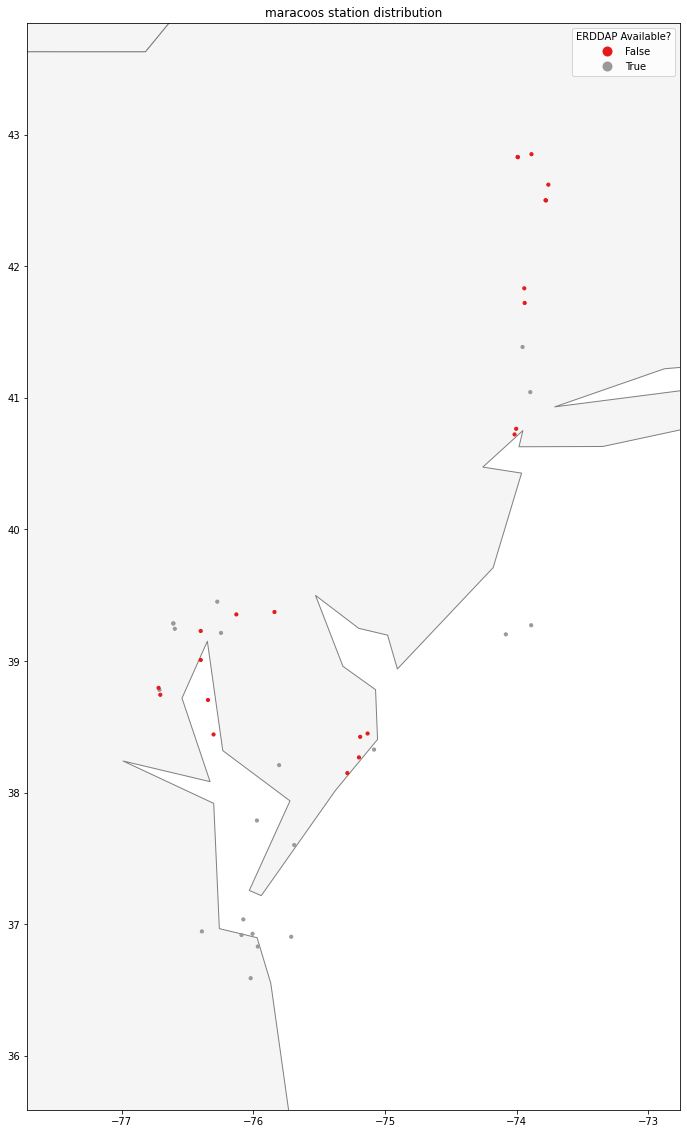

In [16]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='whitesmoke', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         column='erddap_avail', 
         categorical=True, 
         cmap = 'Set1',
         markersize=10, 
         legend=True,
         legend_kwds={'title': "ERDDAP Available?"},
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)

plt.title('{} station distribution'.format(ra))

plt.show()

In [17]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.drop(columns='Variable Names').explore('erddap_avail',cmap = 'Set1')


In [18]:
gdf_final.loc[gdf_final['geometry'].is_empty == True]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",...,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,Unnamed: 18,erddap_avail,geometry


In [19]:
# import urllib.request
# for url in gdf_final.loc[gdf_final['erddap_not_avail'],'Station Description'].str.replace('url: ',''):
#     print(url)
#     try:
#         urllib.request.urlopen(url).getcode()
#     except:
#         print("URL broken: %s" % url)
#         print(gdf_final.loc[gdf_final['Station Description'].str.contains(url,regex=False),'Station ID'])

In [20]:
df.shape

(43, 21)

In [21]:
gdf_final.loc[gdf_final['Station ID']=='Pump Station']

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",...,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,Unnamed: 18,erddap_avail,geometry
18,MARACOOS,Pump Station,N/A: No WMO numbers,Pump Station (Marist/County/USGS) - HRECOS,Hudson River Environmental Conditions Observin...,41.7206,-73.9388,fixed,2012,Y,...,N,Hudson River Environmental Conditions Observin...,nonprofit,Hudson River Environmental Conditions Observin...,RPS-ASA,"dissolved_oxygen_saturation, dissolved_oxygen,...",NaN,NaN,False,POINT (-73.93880 41.72060)


In [22]:
import pandas as pd

url = 'https://data.ioos.us/api/3/action/package_list'

mdf = pd.read_json(url)

metadata_records = len(mdf.result.unique())

print("Found {} records from {}.".format(metadata_records,url))

Found 23 records from https://data.ioos.us/api/3/action/package_list.


In [24]:
from owslib.csw import CatalogueServiceWeb

endpoint = "https://data.ioos.us/csw"

csw = CatalogueServiceWeb(endpoint, timeout=60)

csw.getdomain('GetRecords.resultType')

csw.results

csw.getrecords2()

records = csw.results['matches']

print("Found {} records from {}.".format(records,endpoint))

Found 0 records from https://data.ioos.us/csw.
